In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import scikitplot as skplt
from numpy import nan as NA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score


In [2]:
ONLINE_DATASET = "https://raw.githubusercontent.com/AnnaKudriaeva/eda_and_dev_tools/main/EDA_online_cleared.csv"

In [3]:
df = pd.read_csv(ONLINE_DATASET)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11448 entries, 0 to 11447
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11448 non-null  int64  
 1   Administrative_Duration  11448 non-null  float64
 2   Informational            11448 non-null  int64  
 3   Informational_Duration   11448 non-null  float64
 4   ProductRelated           11448 non-null  int64  
 5   ProductRelated_Duration  11448 non-null  float64
 6   BounceRates              11448 non-null  float64
 7   ExitRates                11448 non-null  float64
 8   PageValues               11448 non-null  float64
 9   SpecialDay               11448 non-null  float64
 10  Month                    11448 non-null  object 
 11  OperatingSystems         11448 non-null  int64  
 12  Browser                  11448 non-null  int64  
 13  Region                   11448 non-null  int64  
 14  TrafficType           

In [5]:
y = df['Revenue']
X = df.drop(['Revenue', 'Month', 'VisitorType'], axis = 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split( 
      X, y, test_size = 0.25, random_state=42) 

In [7]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [8]:
roc_auc_score(y_test, y_pred)

0.7177859989709644

              precision    recall  f1-score   support

       False       0.92      0.91      0.92      2434
        True       0.52      0.52      0.52       428

    accuracy                           0.86      2862
   macro avg       0.72      0.72      0.72      2862
weighted avg       0.86      0.86      0.86      2862



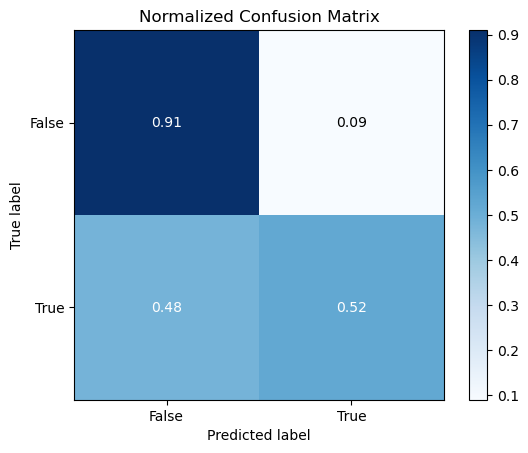

In [9]:
plt_gnb = skplt.metrics.plot_confusion_matrix(y_test,y_pred, normalize=True)
print(classification_report(y_test, y_pred))

Модель GaussianNB чуть лучше, чем наивная

In [10]:
knn_cl = KNeighborsClassifier()

knn_cl.fit(X_train, y_train)

pred_knn = knn_cl.predict(X_test)

In [11]:
roc_auc_score(y_test, pred_knn)

0.6408655802916624

              precision    recall  f1-score   support

       False       0.89      0.97      0.93      2434
        True       0.62      0.32      0.42       428

    accuracy                           0.87      2862
   macro avg       0.76      0.64      0.67      2862
weighted avg       0.85      0.87      0.85      2862



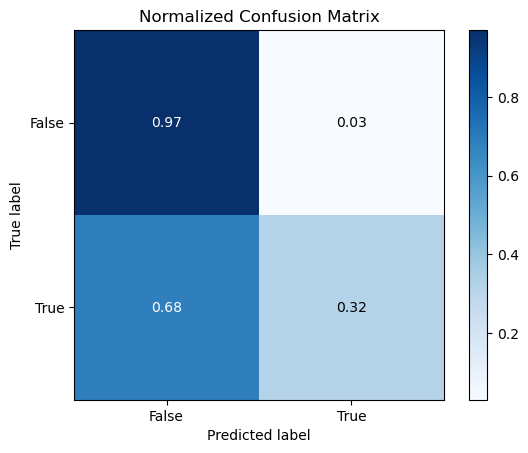

In [12]:
plt_knn = skplt.metrics.plot_confusion_matrix(y_test, pred_knn, normalize=True)
print(classification_report(y_test, pred_knn))

Судя по всему, модель KNeighborsClassifier совсем не подходит, очень сильно ошибается, всего 0.32 доля правильных предсказаний

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [14]:
roc_auc_score(y_test, y_pred_rf)

0.7474562083874089

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2434
        True       0.71      0.53      0.61       428

    accuracy                           0.90      2862
   macro avg       0.82      0.75      0.78      2862
weighted avg       0.89      0.90      0.89      2862



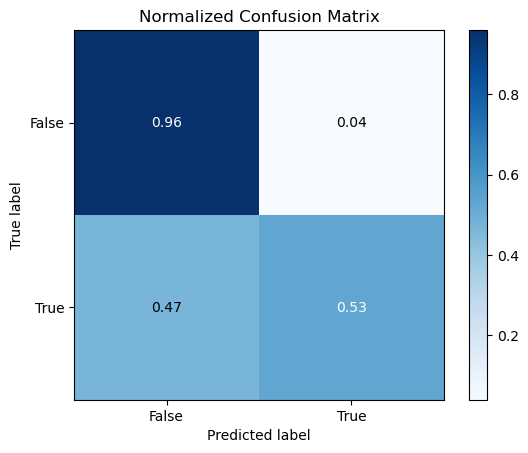

In [15]:
plt_rf = skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True)
print(classification_report(y_test, y_pred_rf))

Модель RandomForestClassifier предсказывает чуть лучше, чем модель GaussianNB

In [16]:
model_lgbm = LGBMClassifier()

model_lgbm.fit(X_train, y_train)
y_pred_lgbm = model_lgbm.predict(X_test)

In [17]:
roc_auc_score(y_test, y_pred_lgbm)

0.7560571038020566

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2434
        True       0.69      0.56      0.62       428

    accuracy                           0.90      2862
   macro avg       0.81      0.76      0.78      2862
weighted avg       0.89      0.90      0.89      2862



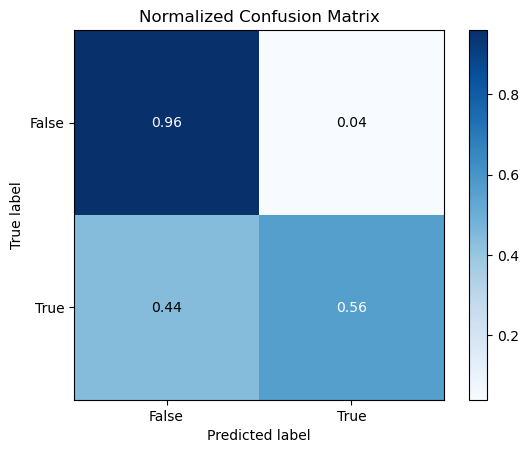

In [18]:
plt_lgbm = skplt.metrics.plot_confusion_matrix(y_test, y_pred_lgbm, normalize=True)
print(classification_report(y_test, y_pred_lgbm))

Пока из всех моделей с настройками по умолчанию, LGBMClassifier работает лучше всего, доля правильных ответов 0.56

Рассмотрим те же модели с подбором гиперпараметров

In [19]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 22),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knn = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
gs_knn.fit(X_train, y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=1, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=2, weights=distance; total time=   0.0s
[CV] END ...............n_neighbors=2, p=1, weights=distance; total time=   0.0s
[CV] END ................n_neighbors=2, p=2, weights=uniform; total time=   0.0s
[CV] END ................n_neighbors=2, p=2, we

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=2)

In [20]:
gs_knn.best_score_, gs_knn.best_params_

(0.8126262506901402, {'n_neighbors': 21, 'p': 1, 'weights': 'distance'})

In [21]:
pred = gs_knn.best_estimator_.predict(X_test)

roc_auc_score(y_test, pred)

0.5602081877452599

              precision    recall  f1-score   support

       False       0.87      0.99      0.93      2434
        True       0.79      0.13      0.22       428

    accuracy                           0.86      2862
   macro avg       0.83      0.56      0.57      2862
weighted avg       0.86      0.86      0.82      2862



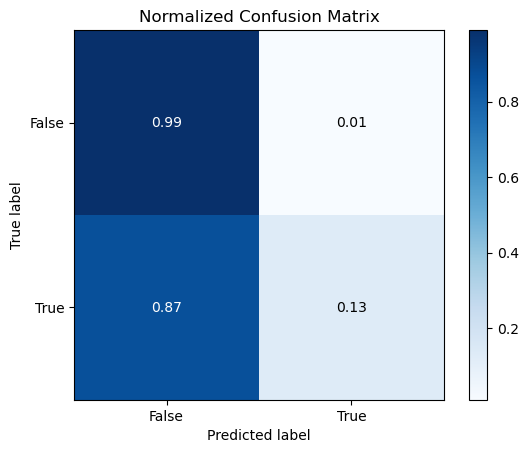

In [22]:
plt_gs_knn = skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
print(classification_report(y_test, pred))

Модель KNeighborsClassifier лучше не стала, работает очень плохо

In [23]:
model_rf = RandomForestClassifier()

params = {'max_depth': range(1, 31, 5),
          'min_samples_split': range(1, 41, 5),
          'n_estimators': range(1, 52, 5),
          'min_samples_leaf': range(1, 13, 2)}

gs_rf = GridSearchCV(model_rf, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train, y_train)

Fitting 3 folds for each of 3168 candidates, totalling 9504 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=16; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=16; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=16; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_sa

/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1188 fits failed out of a total of 9504.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1188 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    val

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 31, 5),
                         'min_samples_leaf': range(1, 13, 2),
                         'min_samples_split': range(1, 41, 5),
                         'n_estimators': range(1, 52, 5)},
             scoring='roc_auc', verbose=2)

In [24]:
gs_rf.best_score_, gs_rf.best_params_

(0.9074696726542392,
 {'max_depth': 11,
  'min_samples_leaf': 3,
  'min_samples_split': 26,
  'n_estimators': 51})

In [25]:
pred = gs_rf.best_estimator_.predict(X_test)

roc_auc_score(y_test, pred)

0.7460700819388875

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2434
        True       0.75      0.52      0.62       428

    accuracy                           0.90      2862
   macro avg       0.83      0.75      0.78      2862
weighted avg       0.89      0.90      0.89      2862



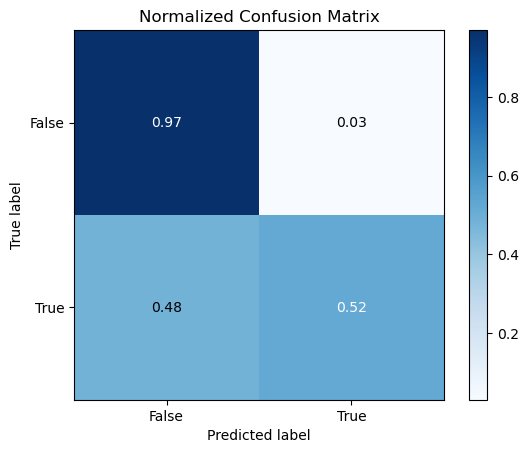

In [26]:
plt_gs_rf = skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
print(classification_report(y_test, pred))

У модель RandomForestClassifier при подборе гиперпараметров незначительно ухудшилось качество предсказания

In [27]:
model = LGBMClassifier()

params = {'n_estimators': range(25, 100, 25),
               'num_leaves': range(25, 100, 25),
               'max_depth': range(1, 15, 5)}

gs_lgbm = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
gs_lgbm.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END ........max_depth=1, n_estimators=25, num_leaves=25; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=50; total time=   0.1s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=25; total time=   0.1s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=25; total time=   0.1s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=75; total time=   0.1s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=50; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=50; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=75; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=25, num_leaves=75; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=50, num_leaves=25; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=50, num_leaves=25; total time=   0.0s
[CV] END ........max_depth=1, n_estimators=50, n

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15, 5),
                         'n_estimators': range(25, 100, 25),
                         'num_leaves': range(25, 100, 25)},
             scoring='roc_auc', verbose=2)

In [28]:
gs_lgbm.best_score_, gs_lgbm.best_params_

(0.9080431429636713, {'max_depth': 6, 'n_estimators': 25, 'num_leaves': 25})

In [29]:
pred = gs_lgbm.best_estimator_.predict(X_test)

roc_auc_score(y_test, pred)

0.7515771507998064

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2434
        True       0.72      0.54      0.62       428

    accuracy                           0.90      2862
   macro avg       0.82      0.75      0.78      2862
weighted avg       0.89      0.90      0.89      2862



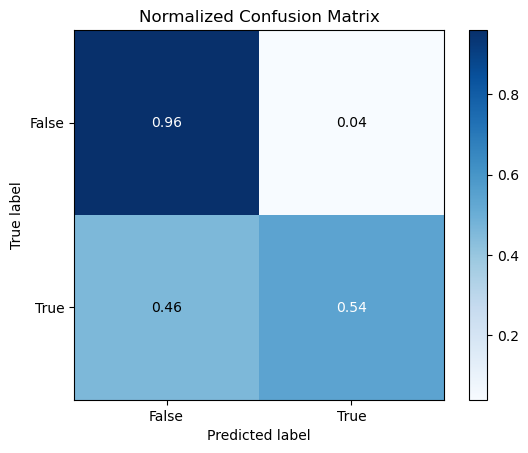

In [30]:
plt_lgbm = skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
print(classification_report(y_test, pred))

У модель LGBMClassifier при подборе гиперпараметров незначительно ухудшилось качество предсказания

Добавим категориальные признаки и снова рассмотрим модели с подбором гиперпараметров

In [31]:
X_full = df.drop('Revenue', axis=1)

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.25, random_state=42)

In [32]:
X_train_full.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
dtype: object

In [33]:
X_train_full.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

In [34]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

categorical = ['Month', 'VisitorType']
numeric_features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'Weekend']

ct = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', MinMaxScaler(), numeric_features)
])

X_train_transformed = ct.fit_transform(X_train_full)
X_test_transformed = ct.transform(X_test_full)

In [35]:
new_features = list(ct.named_transformers_['ohe'].get_feature_names_out())
new_features.extend(numeric_features)

new_features

['Month_Aug',
 'Month_Dec',
 'Month_Feb',
 'Month_Jul',
 'Month_June',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'Month_Sep',
 'VisitorType_New_Visitor',
 'VisitorType_Other',
 'VisitorType_Returning_Visitor',
 'Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'Weekend']

In [36]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=new_features)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=new_features)

X_train_transformed.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.023361,0.045455,0.022727,0.0,0.0,0.142857,0.083333,0.750,0.052632,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001290,0.000000,0.150000,0.0,0.0,0.142857,0.083333,1.000,0.526316,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.001211,0.500000,0.400000,0.0,0.0,0.285714,0.083333,0.375,0.526316,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.015596,0.011111,0.105556,0.0,0.0,0.142857,0.333333,0.250,0.052632,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.013354,0.000000,0.041667,0.0,0.0,0.428571,0.000000,0.000,0.473684,0.0


In [37]:
model = KNeighborsClassifier()

params = {'n_neighbors' : np.arange(2, 20, 2),
          'weights' : ['uniform', 'distance'],
          'p' : [1, 2]}

gs_knn = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=5)
gs_knn.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[CV 2/3] END n_neighbors=2, p=2, weights=uniform;, score=0.645 total time=   0.1s
[CV 1/3] END n_neighbors=2, p=2, weights=uniform;, score=0.641 total time=   0.1s
[CV 1/3] END n_neighbors=2, p=2, weights=distance;, score=0.643 total time=   0.1s
[CV 3/3] END n_neighbors=2, p=2, weights=uniform;, score=0.641 total time=   0.1s
[CV 2/3] END n_neighbors=2, p=2, weights=distance;, score=0.649 total time=   0.1s
[CV 3/3] END n_neighbors=2, p=2, weights=distance;, score=0.642 total time=   0.1s
[CV 1/3] END n_neighbors=2, p=1, weights=uniform;, score=0.655 total time=   0.5s
[CV 3/3] END n_neighbors=2, p=1, weights=distance;, score=0.647 total time=   0.5s
[CV 2/3] END n_neighbors=2, p=1, weights=uniform;, score=0.659 total time=   0.5s
[CV 1/3] END n_neighbors=2, p=1, weights=distance;, score=0.657 total time=   0.5s
[CV 3/3] END n_neighbors=2, p=1, weights=uniform;, score=0.648 total time=   0.6s
[CV 2/3] END n_neighbors=2, p=1, weights=distance;, score=0.661 total time=   0.6s
[CV 1/3] E

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=5)

In [38]:
gs_knn.best_score_, gs_knn.best_params_

(0.7772762135644166, {'n_neighbors': 18, 'p': 1, 'weights': 'distance'})

In [39]:
pred = gs_knn.best_estimator_.predict(X_test_transformed)

roc_auc_score(y_test_full, pred)

0.5349948932183476

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2434
        True       0.60      0.08      0.14       428

    accuracy                           0.85      2862
   macro avg       0.73      0.53      0.53      2862
weighted avg       0.82      0.85      0.80      2862



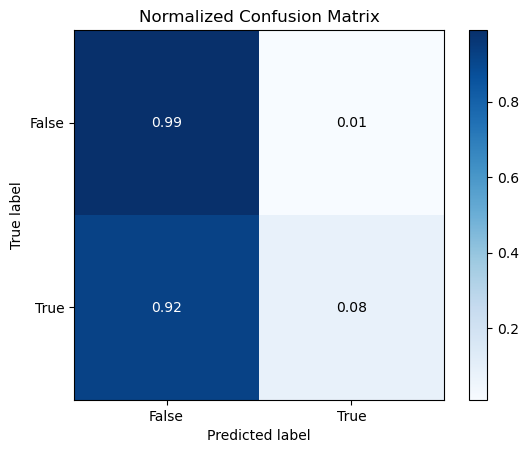

In [40]:
plt_gs_knn = skplt.metrics.plot_confusion_matrix(y_test_full, pred, normalize=True)
print(classification_report(y_test_full, pred))

In [41]:
gnb = GaussianNB()

gnb.fit(X_train_transformed, y_train_full)

y_pred = gnb.predict(X_test_transformed)

In [42]:
roc_auc_score(y_test_full, pred)

0.5349948932183476

              precision    recall  f1-score   support

       False       0.86      0.99      0.92      2434
        True       0.60      0.08      0.14       428

    accuracy                           0.85      2862
   macro avg       0.73      0.53      0.53      2862
weighted avg       0.82      0.85      0.80      2862



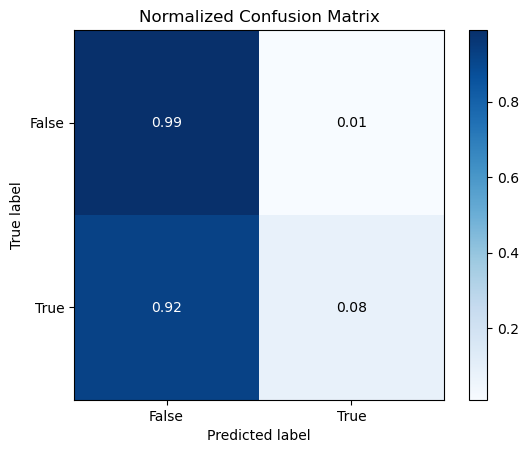

In [43]:
plt_gnb = skplt.metrics.plot_confusion_matrix(y_test_full, pred, normalize=True)
print(classification_report(y_test_full, pred))

Добавление категориальных признаков очень негативно повлияло на качество предсказание моделей GaussianNB и KNeighborsClassifier

In [44]:
model = LGBMClassifier()

params = {'n_estimators': range(5, 200, 15),
               'num_leaves': range(5, 200, 15),
               'max_depth': range(1, 22, 5)}

gs_lgbm = GridSearchCV(model, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
gs_lgbm.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 845 candidates, totalling 2535 fits
[CV] END ..........max_depth=1, n_estimators=5, num_leaves=5; total time=   0.0s
[CV] END ..........max_depth=1, n_estimators=5, num_leaves=5; total time=   0.0s
[CV] END ..........max_depth=1, n_estimators=5, num_leaves=5; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=20; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=20; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=20; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=35; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=50; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=35; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=35; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5, num_leaves=50; total time=   0.0s
[CV] END .........max_depth=1, n_estimators=5

GridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 22, 5),
                         'n_estimators': range(5, 200, 15),
                         'num_leaves': range(5, 200, 15)},
             scoring='roc_auc', verbose=2)

In [45]:
gs_lgbm.best_score_, gs_lgbm.best_params_

(0.9312053431535031, {'max_depth': 6, 'n_estimators': 35, 'num_leaves': 20})

In [46]:
pred = gs_lgbm.best_estimator_.predict(X_test_transformed)

roc_auc_score(y_test_full, pred)

0.7777657254317727

              precision    recall  f1-score   support

       False       0.93      0.96      0.95      2434
        True       0.72      0.60      0.65       428

    accuracy                           0.91      2862
   macro avg       0.83      0.78      0.80      2862
weighted avg       0.90      0.91      0.90      2862



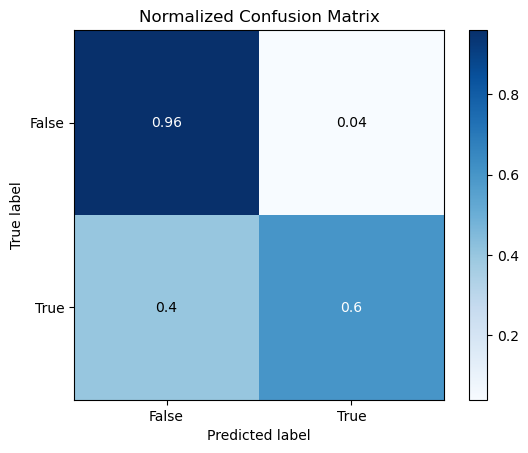

In [47]:
plt_gs_lgbm = skplt.metrics.plot_confusion_matrix(y_test_full, pred, normalize=True)
print(classification_report(y_test_full, pred))

Качество предсказания модели LGBMClassifier улучшилось,0.6 доля правильных предсказаний

In [48]:
model_rf = RandomForestClassifier()

params = {'max_depth': range(1, 31, 5),
          'min_samples_split': range(1, 41, 5),
          'n_estimators': range(1, 51, 5),
          'min_samples_leaf': range(1, 13, 2)}

gs_rf = GridSearchCV(model_rf, params, scoring='roc_auc', cv=3, n_jobs=-1, verbose=2)
gs_rf.fit(X_train_transformed, y_train_full)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=1; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=6; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=1, n_estimators=11; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samp

/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1080 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/Users/annakudriaeva/miniconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    val

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 31, 5),
                         'min_samples_leaf': range(1, 13, 2),
                         'min_samples_split': range(1, 41, 5),
                         'n_estimators': range(1, 51, 5)},
             scoring='roc_auc', verbose=2)

In [49]:
gs_rf.best_score_, gs_rf.best_params_

(0.9270016528302046,
 {'max_depth': 21,
  'min_samples_leaf': 7,
  'min_samples_split': 26,
  'n_estimators': 41})

In [50]:
pred = gs_rf.best_estimator_.predict(X_test_transformed)

roc_auc_score(y_test_full, pred)

0.7522577350463451

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2434
        True       0.74      0.54      0.62       428

    accuracy                           0.90      2862
   macro avg       0.83      0.75      0.78      2862
weighted avg       0.90      0.90      0.90      2862



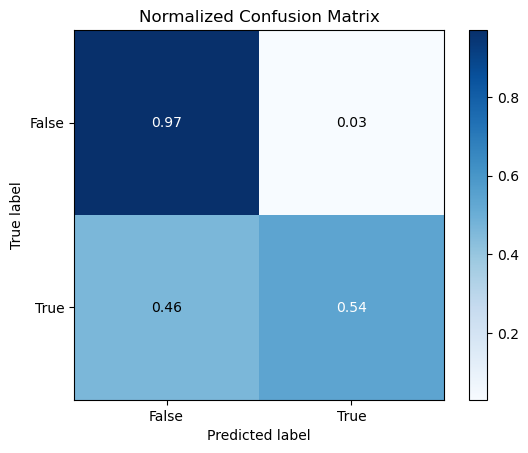

In [51]:
plt_gs_rf = skplt.metrics.plot_confusion_matrix(y_test_full, pred, normalize=True)
print(classification_report(y_test_full, pred))

Добавление категориальныз признаков не изменило качество предсказания модели RandomForestClassifier, 0.54 доля правильных предсказаний

In [52]:
import eli5 # permutation importance
import shap # shapley

In [53]:
X_train_transformed.shape

(8586, 28)

In [54]:
perm = eli5.sklearn.PermutationImportance(gs_lgbm.best_estimator_, random_state=42).\
    fit(X_train_transformed, y_train_full)

eli5.show_weights(perm, feature_names = X_train_transformed.columns.tolist())

Weight,Feature
0.1843 ± 0.0060,PageValues
0.0164 ± 0.0026,ExitRates
0.0110 ± 0.0017,Month_Nov
0.0108 ± 0.0020,ProductRelated
0.0069 ± 0.0019,BounceRates
0.0068 ± 0.0011,Administrative
0.0048 ± 0.0014,ProductRelated_Duration
0.0035 ± 0.0014,Administrative_Duration
0.0026 ± 0.0006,TrafficType
0.0025 ± 0.0008,VisitorType_Returning_Visitor


In [55]:
f = lambda x: gs_lgbm.best_estimator_.predict_proba(x)[:,1]
med = X_train_transformed.median().values.reshape((1,28))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test_transformed.iloc[:1000,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


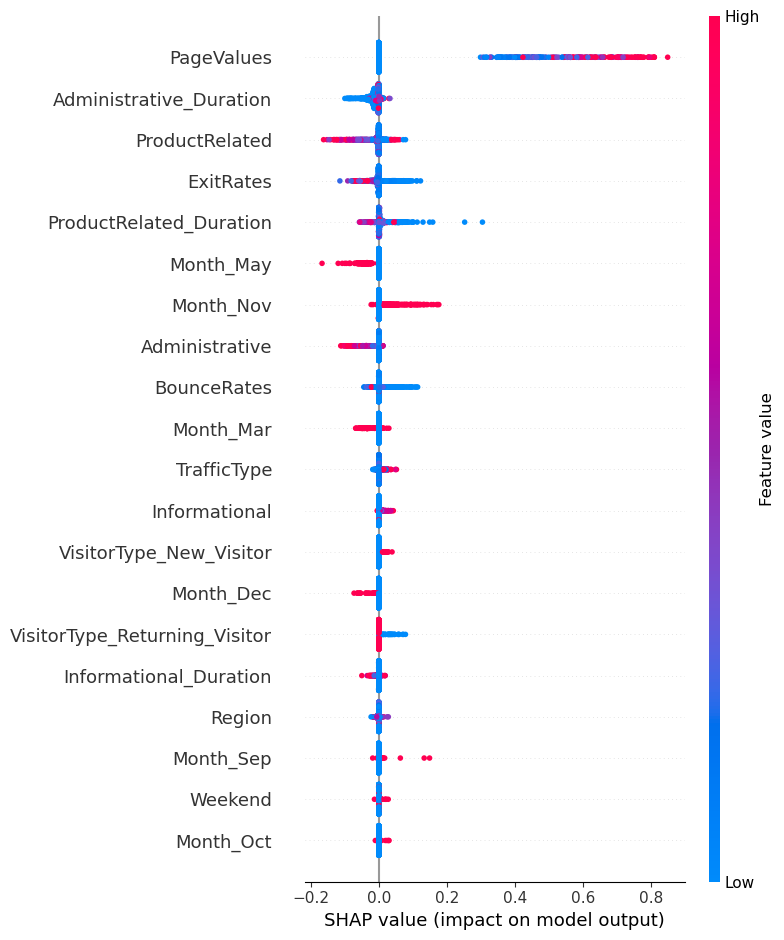

In [56]:
shap.summary_plot(shap_values, X_test_transformed.iloc[:1000])

In [57]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

In [58]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [59]:
explainer = ClassifierExplainer(gs_rf.best_estimator_, X_test_transformed.iloc[:10], y_test_full.iloc[:10])

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [60]:
db = ExplainerDashboard(explainer)

Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating predictions...
Calculating pred_percentiles...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store

In [61]:
db.run()

Starting ExplainerDashboard on http://192.168.88.252:8050


### Вывод

1. В среднем наиболее важные факторы для получения прогноза PagesValues, Month_Nov, ExitRates
2. Лучшая модель LGBMClassifier при добавлении категориальных признаков, доля правильных прелсказаний 0.6, метрика roc_auc 0.777 соответствует качеству модели бинарной классификации
3. По индивидуальным прогнозам: у некоторых индексов вероятность корректного предсказания очень высока, например, у 1 и 5 вероятность корректного предсказания около 99 процентов, а у 3 -  50 процентов, то есть по факту случайное.